In [ ]:
# Install the dependancies
!pip install tensorflow
!pip install -q tf-agents
!pip install qiskit 
!pip install numpy

In [ ]:
!pip3 uninstall protobuf --yes
!pip3 uninstall python-protobuf --yes
!pip install protobuf 


# TRAINING 

In [15]:
from environment import QiskitEnv
import numpy as np
from tf_agents.environments import tf_py_environment
from agent import Agent
from qiskit.visualization import plot_bloch_multivector
import matplotlib as plt

# Learning Parameters
num_iterations = 1000

#In an iteration multiple episodes are collected together and a trajectory is built out of it.
#Later these trajectory is used for learning. Trajectory is added to a replay buffer and analysed together.
collect_episodes_per_iteration = 250  #
replay_buffer_capacity = 2000  


learning_rate = 1e-3  
num_eval_episodes = 2  
eval_interval = 50
num_intervals = 10
interval_length = 60


"""Environemnt which make use of Qiskit Pulse Simulator and pulse builder to simulate 
the dynamics of a qubit under the influence of a pulse. The RL agent interact with this 
environment through action defined as pulse lenght. Here a constant pulse of amplitude 1 
is used and applied for a time "pulse width". "pulse width" is the action that the agent 
takes here. The agent observes the state obtained with the action along with the Fidelity 
to the expected final state. Here initial state is fixed to |0> and target state is |1>

The pulse is designed as follows
  The process time is divided into "num_intervals" of length "interval_length".
  For each interval a constant amplitude of range(0,1) is defined by the agent
  delay the mesearement channel for num_intervals*interval_length + 10 time and make mesurement.
TODO: Make the environement more gernect to handle different operators and initial states"""
environment =  QiskitEnv(np.array([1,0]),num_intervals, interval_length)

#convert the python environment to tensorflow compactible format for training.
tf_dumm = tf_py_environment.TFPyEnvironment(environment)
"""Get the reinfoce agent. Reward is the fielily to target state. Observation is the state"""
agent = Agent(num_iterations,collect_episodes_per_iteration,replay_buffer_capacity,learning_rate,num_eval_episodes,eval_interval, num_intervals, interval_length)
agent_reinforce = agent.get_agent(environment, 'reinforce', "without_noise_trained")
train_results = agent.train(tf_dumm, agent_reinforce)


/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


0 tf.Tensor([ 9.7766215e-01  5.2491119e-05 -1.9506200e-01  7.8278832e-02], shape=(4,), dtype=float32) tf.Tensor([0.00441768], shape=(1,), dtype=float32)
0 tf.Tensor([ 9.1245812e-01 -9.4043477e-05  1.9207092e-01  3.6128792e-01], shape=(4,), dtype=float32) tf.Tensor([0.01674202], shape=(1,), dtype=float32)
0 tf.Tensor([ 8.0668038e-01  1.2404509e-04  4.9016345e-01 -3.3016145e-01], shape=(4,), dtype=float32) tf.Tensor([0.03492668], shape=(1,), dtype=float32)
0 tf.Tensor([ 6.6384590e-01 -1.1843739e-04 -4.8066920e-01 -5.7294476e-01], shape=(4,), dtype=float32) tf.Tensor([0.05593086], shape=(1,), dtype=float32)
0 tf.Tensor([ 4.9446407e-01  1.0922611e-04 -6.0393292e-01  6.2511623e-01], shape=(4,), dtype=float32) tf.Tensor([0.07555053], shape=(1,), dtype=float32)
0 tf.Tensor([ 3.0047083e-01 -8.1349463e-05  7.5156599e-01  5.8725280e-01], shape=(4,), dtype=float32) tf.Tensor([0.09097173], shape=(1,), dtype=float32)
0 tf.Tensor([ 9.4330899e-02  2.0349220e-05  5.2757668e-01 -8.4425384e-01], shape=(

5 tf.Tensor([ 4.9446407e-01  1.0922611e-04 -6.0393292e-01  6.2511623e-01], shape=(4,), dtype=float32) tf.Tensor([0.07555053], shape=(1,), dtype=float32)
5 tf.Tensor([ 3.0047083e-01 -8.1349463e-05  7.5156599e-01  5.8725280e-01], shape=(4,), dtype=float32) tf.Tensor([0.09097173], shape=(1,), dtype=float32)
5 tf.Tensor([ 9.4330899e-02  2.0349220e-05  5.2757668e-01 -8.4425384e-01], shape=(4,), dtype=float32) tf.Tensor([0.09911017], shape=(1,), dtype=float32)
5 tf.Tensor([-1.1606551e-01  2.4891771e-05 -8.9273548e-01 -4.3537593e-01], shape=(4,), dtype=float32) tf.Tensor([0.09865288], shape=(1,), dtype=float32)
5 tf.Tensor([-3.1997743e-01 -7.7649776e-05 -3.2398185e-01  8.9030904e-01], shape=(4,), dtype=float32) tf.Tensor([0.08976144], shape=(1,), dtype=float32)
5 tf.Tensor([-5.1080292e-01  1.2824644e-04  8.3421242e-01  2.0777398e-01], shape=(4,), dtype=float32) tf.Tensor([0.73908037], shape=(1,), dtype=float32)
6 tf.Tensor([ 9.7766215e-01  5.2491119e-05 -1.9506200e-01  7.8278832e-02], shape=(

0 tf.Tensor([-5.8672798e-01  6.2216423e-05  7.8578544e-01  1.9568202e-01], shape=(4,), dtype=float32) tf.Tensor([0.6557503], shape=(1,), dtype=float32)
1 tf.Tensor([ 9.7305441e-01  6.4616223e-05 -2.1398944e-01  8.5870169e-02], shape=(4,), dtype=float32) tf.Tensor([0.00531652], shape=(1,), dtype=float32)
1 tf.Tensor([ 8.99575293e-01 -1.08507076e-04  2.05003828e-01  3.85665327e-01], shape=(4,), dtype=float32) tf.Tensor([0.01907643], shape=(1,), dtype=float32)
1 tf.Tensor([ 7.8260332e-01  1.3199646e-04  5.1632494e-01 -3.4776512e-01], shape=(4,), dtype=float32) tf.Tensor([0.0387532], shape=(1,), dtype=float32)
1 tf.Tensor([ 6.3632172e-01 -1.3826920e-04 -4.9578217e-01 -5.9101158e-01], shape=(4,), dtype=float32) tf.Tensor([0.05950946], shape=(1,), dtype=float32)
1 tf.Tensor([ 4.5738795e-01  6.4091422e-05 -6.1788332e-01  6.3954395e-01], shape=(4,), dtype=float32) tf.Tensor([0.07907963], shape=(1,), dtype=float32)
1 tf.Tensor([ 2.47772023e-01 -1.13543894e-04  7.63393402e-01  5.96522927e-01], s

0 tf.Tensor([ 6.28327429e-01 -1.05362196e-04 -5.00016332e-01 -5.95976770e-01], shape=(4,), dtype=float32) tf.Tensor([0.06052047], shape=(1,), dtype=float32)
0 tf.Tensor([ 4.66743678e-01  1.10877845e-04 -6.14468157e-01  6.36065423e-01], shape=(4,), dtype=float32) tf.Tensor([0.07821503], shape=(1,), dtype=float32)
0 tf.Tensor([ 2.606976e-01 -7.507940e-05  7.607451e-01  5.943935e-01], shape=(4,), dtype=float32) tf.Tensor([0.09320367], shape=(1,), dtype=float32)
0 tf.Tensor([ 3.0069035e-02  4.0767696e-05  5.2966809e-01 -8.4767187e-01], shape=(4,), dtype=float32) tf.Tensor([0.09990959], shape=(1,), dtype=float32)
0 tf.Tensor([-1.1977796e-01  4.1878044e-05 -8.9234096e-01 -4.3517905e-01], shape=(4,), dtype=float32) tf.Tensor([0.09856533], shape=(1,), dtype=float32)
0 tf.Tensor([-2.5763604e-01 -3.3687269e-05 -3.3043507e-01  9.0798479e-01], shape=(4,), dtype=float32) tf.Tensor([0.09336237], shape=(1,), dtype=float32)
0 tf.Tensor([-4.3978480e-01  1.5679869e-04  8.7146211e-01  2.1712472e-01], sha

1 tf.Tensor([-2.7204061e-01  2.3313416e-06 -8.6493379e-01 -4.2176229e-01], shape=(4,), dtype=float32) tf.Tensor([0.09259939], shape=(1,), dtype=float32)
1 tf.Tensor([-4.0190396e-01 -4.4689510e-05 -3.1311586e-01  8.6048341e-01], shape=(4,), dtype=float32) tf.Tensor([0.08384732], shape=(1,), dtype=float32)
1 tf.Tensor([-5.3356415e-01  1.1022115e-04  8.2067728e-01  2.0444588e-01], shape=(4,), dtype=float32) tf.Tensor([0.7153093], shape=(1,), dtype=float32)
step = 300: Average Return = 1.3169841766357422
0 tf.Tensor([ 9.6611881e-01  7.8078316e-05 -2.3952636e-01  9.6133150e-02], shape=(4,), dtype=float32) tf.Tensor([0.00666145], shape=(1,), dtype=float32)
0 tf.Tensor([ 8.6652744e-01 -1.4335627e-04  2.3430756e-01  4.4071546e-01], shape=(4,), dtype=float32) tf.Tensor([0.02491302], shape=(1,), dtype=float32)
0 tf.Tensor([ 6.9643283e-01  2.0018380e-04  5.9516966e-01 -4.0094179e-01], shape=(4,), dtype=float32) tf.Tensor([0.05149813], shape=(1,), dtype=float32)
0 tf.Tensor([ 4.7869930e-01 -1.7518

1 tf.Tensor([ 5.927402e-01 -8.549008e-05 -5.177212e-01 -6.169472e-01], shape=(4,), dtype=float32) tf.Tensor([0.06486591], shape=(1,), dtype=float32)
1 tf.Tensor([ 4.0543193e-01  1.7885808e-04 -6.3506722e-01  6.5750629e-01], shape=(4,), dtype=float32) tf.Tensor([0.08356249], shape=(1,), dtype=float32)
1 tf.Tensor([2.1514513e-01 1.3610356e-05 7.6956218e-01 6.0123754e-01], shape=(4,), dtype=float32) tf.Tensor([0.09537125], shape=(1,), dtype=float32)
1 tf.Tensor([ 1.3334209e-02  1.2869641e-04  5.2986294e-01 -8.4797847e-01], shape=(4,), dtype=float32) tf.Tensor([0.09998222], shape=(1,), dtype=float32)
1 tf.Tensor([-1.7849255e-01  1.2590847e-04 -8.8438106e-01 -4.3128937e-01], shape=(4,), dtype=float32) tf.Tensor([0.09681404], shape=(1,), dtype=float32)
1 tf.Tensor([-3.3337921e-01  4.9351322e-05 -3.2242671e-01  8.8594544e-01], shape=(4,), dtype=float32) tf.Tensor([0.08888583], shape=(1,), dtype=float32)
1 tf.Tensor([-4.5242506e-01  1.8601502e-04  8.6533540e-01  2.1565302e-01], shape=(4,), dty

0 tf.Tensor([ 1.18733175e-01  6.45693144e-05  5.26177645e-01 -8.42044830e-01], shape=(4,), dtype=float32) tf.Tensor([0.09859024], shape=(1,), dtype=float32)
0 tf.Tensor([-6.9398932e-02  7.0271395e-05 -8.9664155e-01 -4.3728447e-01], shape=(4,), dtype=float32) tf.Tensor([0.09951838], shape=(1,), dtype=float32)
0 tf.Tensor([-2.6929447e-01 -2.4293979e-05 -3.2934561e-01  9.0499282e-01], shape=(4,), dtype=float32) tf.Tensor([0.09274805], shape=(1,), dtype=float32)
0 tf.Tensor([-4.4229773e-01  1.4959343e-04  8.7026429e-01  2.1682414e-01], shape=(4,), dtype=float32) tf.Tensor([0.80437267], shape=(1,), dtype=float32)
1 tf.Tensor([ 9.8234493e-01  4.2100412e-05 -1.7362179e-01  6.9670022e-02], shape=(4,), dtype=float32) tf.Tensor([0.00349984], shape=(1,), dtype=float32)
1 tf.Tensor([ 9.1956884e-01 -8.5586238e-05  1.8450780e-01  3.4691498e-01], shape=(4,), dtype=float32) tf.Tensor([0.01543931], shape=(1,), dtype=float32)
1 tf.Tensor([ 8.1519186e-01  1.4308419e-04  4.8035097e-01 -3.2361269e-01], sha

0 tf.Tensor([ 9.8360646e-01  3.9131646e-05 -1.6735715e-01  6.7155637e-02], shape=(4,), dtype=float32) tf.Tensor([0.00325183], shape=(1,), dtype=float32)
0 tf.Tensor([ 9.2487353e-01 -7.8930818e-05  1.7856559e-01  3.3574292e-01], shape=(4,), dtype=float32) tf.Tensor([0.0144609], shape=(1,), dtype=float32)
0 tf.Tensor([ 8.2789409e-01  1.3269162e-04  4.6516845e-01 -3.1338421e-01], shape=(4,), dtype=float32) tf.Tensor([0.03145913], shape=(1,), dtype=float32)
0 tf.Tensor([ 6.9571567e-01 -8.2186511e-05 -4.6172041e-01 -5.5026722e-01], shape=(4,), dtype=float32) tf.Tensor([0.05159797], shape=(1,), dtype=float32)
0 tf.Tensor([ 5.3237104e-01  1.5500892e-04 -5.8814740e-01  6.0882151e-01], shape=(4,), dtype=float32) tf.Tensor([0.0716581], shape=(1,), dtype=float32)
0 tf.Tensor([3.4762844e-01 8.2138404e-06 7.3884410e-01 5.7729012e-01], shape=(4,), dtype=float32) tf.Tensor([0.08791545], shape=(1,), dtype=float32)
0 tf.Tensor([ 1.7908953e-01  7.1808885e-05  5.2137399e-01 -8.3432370e-01], shape=(4,), d

1 tf.Tensor([ 6.9488347e-01 -8.8685170e-05 -4.6223244e-01 -5.5088848e-01], shape=(4,), dtype=float32) tf.Tensor([0.05171369], shape=(1,), dtype=float32)
1 tf.Tensor([ 5.2715570e-01  1.5045101e-04 -5.9041733e-01  6.1115813e-01], shape=(4,), dtype=float32) tf.Tensor([0.07221068], shape=(1,), dtype=float32)
1 tf.Tensor([ 3.3422706e-01 -2.7513972e-05  7.4267542e-01  5.8028054e-01], shape=(4,), dtype=float32) tf.Tensor([0.08882923], shape=(1,), dtype=float32)
1 tf.Tensor([ 1.5349454e-01  6.3770902e-05  5.2366054e-01 -8.3798516e-01], shape=(4,), dtype=float32) tf.Tensor([0.09764394], shape=(1,), dtype=float32)
1 tf.Tensor([-2.865592e-02  6.653014e-05 -8.984300e-01 -4.381807e-01], shape=(4,), dtype=float32) tf.Tensor([0.09991788], shape=(1,), dtype=float32)
1 tf.Tensor([-2.2377029e-01 -3.5701254e-05 -3.3331716e-01  9.1587472e-01], shape=(4,), dtype=float32) tf.Tensor([0.09499268], shape=(1,), dtype=float32)
1 tf.Tensor([-3.8536033e-01  1.2878628e-04  8.9538449e-01  2.2312336e-01], shape=(4,),

0 tf.Tensor([ 1.4134589e-01  7.0212096e-05  5.2463460e-01 -8.3951169e-01], shape=(4,), dtype=float32) tf.Tensor([0.09800214], shape=(1,), dtype=float32)
0 tf.Tensor([-4.4889137e-02  6.6740278e-05 -8.9788699e-01 -4.3793145e-01], shape=(4,), dtype=float32) tf.Tensor([0.09979849], shape=(1,), dtype=float32)
0 tf.Tensor([-2.5241914e-01 -4.1952499e-05 -3.3092368e-01  9.0927118e-01], shape=(4,), dtype=float32) tf.Tensor([0.09362846], shape=(1,), dtype=float32)
0 tf.Tensor([-3.6811215e-01  6.2360799e-05  9.0218335e-01  2.2485252e-01], shape=(4,), dtype=float32) tf.Tensor([0.8644934], shape=(1,), dtype=float32)
1 tf.Tensor([ 9.8157036e-01  4.4011846e-05 -1.7735496e-01  7.1167894e-02], shape=(4,), dtype=float32) tf.Tensor([0.00365197], shape=(1,), dtype=float32)
1 tf.Tensor([ 9.2169094e-01 -8.4281593e-05  1.8213110e-01  3.4251139e-01], shape=(4,), dtype=float32) tf.Tensor([0.01504858], shape=(1,), dtype=float32)
1 tf.Tensor([ 8.25834572e-01  1.03242935e-04  4.67677116e-01 -3.15079838e-01], shap

In [12]:
from tf_agents.policies import policy_saver
policy_dir = "policy"
tf_policy_saver = policy_saver.PolicySaver(agent_reinforce.policy)
tf_policy_saver.save(policy_dir)

2021-10-24 08:26:23.559031: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_policy/assets


/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:558: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: best_policy/assets


# Evaluation

/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


Fidelity :  0.9847574336749834
Control pulse [0.47392523, 0.47562307, 0.52642405, 0.43271852, 0.49294624]


/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


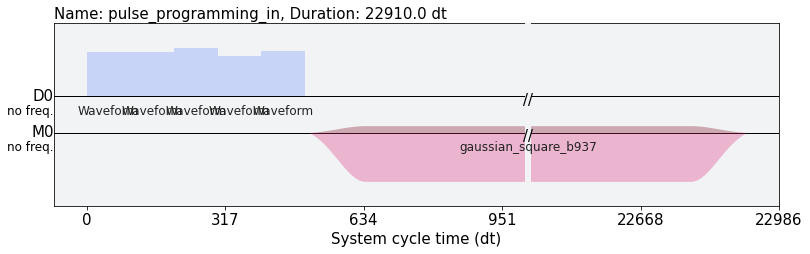

In [11]:

env_test = QiskitEnv(np.array([0,1]),5,100)
vector,fid,action, pulse_prog = agent.evaluate(agent_reinforce, env_test)
print("Fidelity : ", fid)
control_pulse = [act.numpy()[0][0] for act in action ]
print("Control pulse",control_pulse)
env_test.get_state(control_pulse)
#plot_bloch_multivector(vector)
pulse_prog.draw()

# Load Best Policy

/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/kevinabraham/opt/anaconda3/envs/PythonARM/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


Showing the results of the best policy
Fidelity :  0.9847574336749834
Initial State:  [1, 0]
Final State:  [-0.12346057+0.00023232j -0.986908  +0.10377874j]





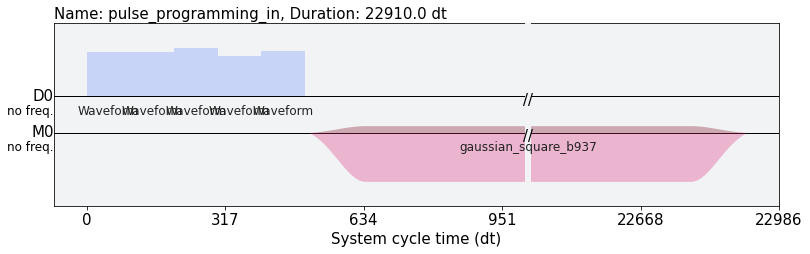

In [13]:
import tensorflow as tf 
import numpy as np
from tensorflow.saved_model import load
from tf_agents import policies
from environment import QiskitEnv
import warnings
import logging, sys
def evaluate(policy, eval_py_env):
        eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)
        num_episodes = 1
        fidelity = []
        actions = []
        for _ in range(num_episodes):
            time_step = eval_env.reset()
            while not time_step.is_last():
                action_step = policy.action(time_step)
                time_step = eval_env.step(action_step.action)
                actions.append(action_step.action)
        fidelity,state, pulse_prog = eval_py_env.get_state(actions)
        return state, fidelity, actions,pulse_prog

env_test = QiskitEnv(np.array([0,1]),5,100)
policy_dir = "best_policy"
saved_policy = load(policy_dir)
state, fidelity, actions,pulse_prog =  evaluate(saved_policy,env_test)    
print("Showing the results of the best policy")
print("Fidelity : ",fidelity)
print("Initial State: ", [1,0])
print("Final State: ", state)
print("\n\n")
pulse_prog.draw()

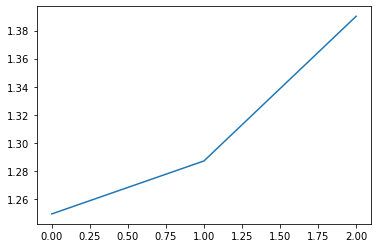

In [14]:
plt.pyplot.plot(train_results[2])